# Snippet Creator and Hacking Space 

Hacking space. 

Use snippets.py (previously dm.py) or whatever for the code... 

## Provenance

* dm.ipynb renamed snippet_runner.ipynb to coordinate with snippets.py
* Moved into agg project, untracked June 28, 2022
* Created new as Learning_SLY June 23, 2022

In [ ]:
# see the parser
%run aggregate/parser.py

In [11]:
agg.parser.UnderwritingParser.enhance_debugfile()

time: 16 ms (started: 2022-07-07 21:42:59 -04:00)


In [1]:
logger_level(30)
%run -i snippets.py

time: 703 ms (started: 2022-07-07 21:48:18 -04:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [ ]:
# save grammar 
agg.grammar()

# NewCo Re Capital Model

## Effect on the tail of adding cat...really depends on the relative vol of non-cat.

In [5]:
logger_level(30)
%run -i snippets.py 
# %run -i snippets.py parse_tests

time: 0 ns (started: 2022-07-08 14:00:43 -04:00)


In [4]:
porta = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=1)

portb = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma  27000 cv .01 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=2)

time: 3.76 s (started: 2022-07-08 12:45:07 -04:00)


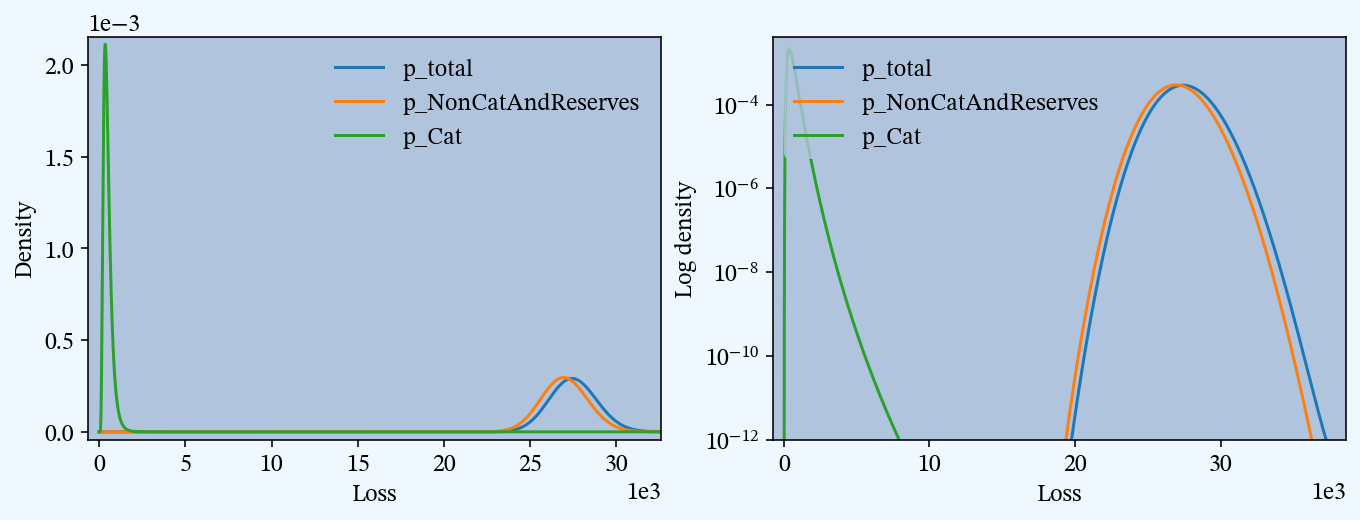

time: 2.55 s (started: 2022-07-08 12:45:12 -04:00)


In [5]:
porta.plot()

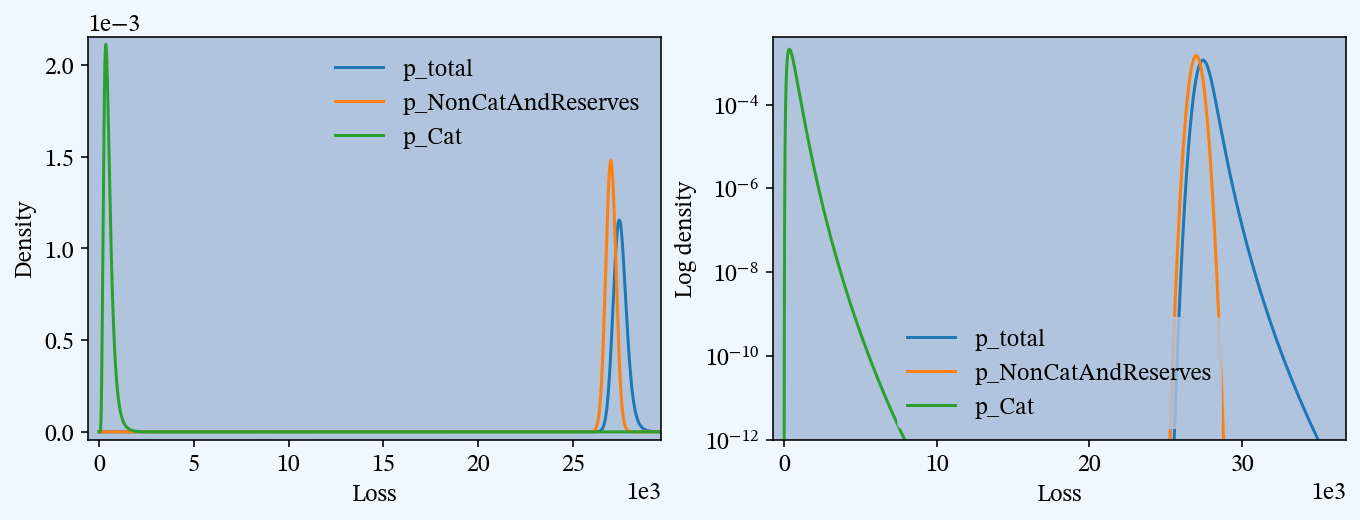

time: 3.02 s (started: 2022-07-08 12:45:15 -04:00)


In [6]:
portb.plot()

In [11]:
cs.enhance_portfolio(porta)
cs.enhance_portfolio(portb)

time: 0 ns (started: 2022-07-08 12:46:21 -04:00)


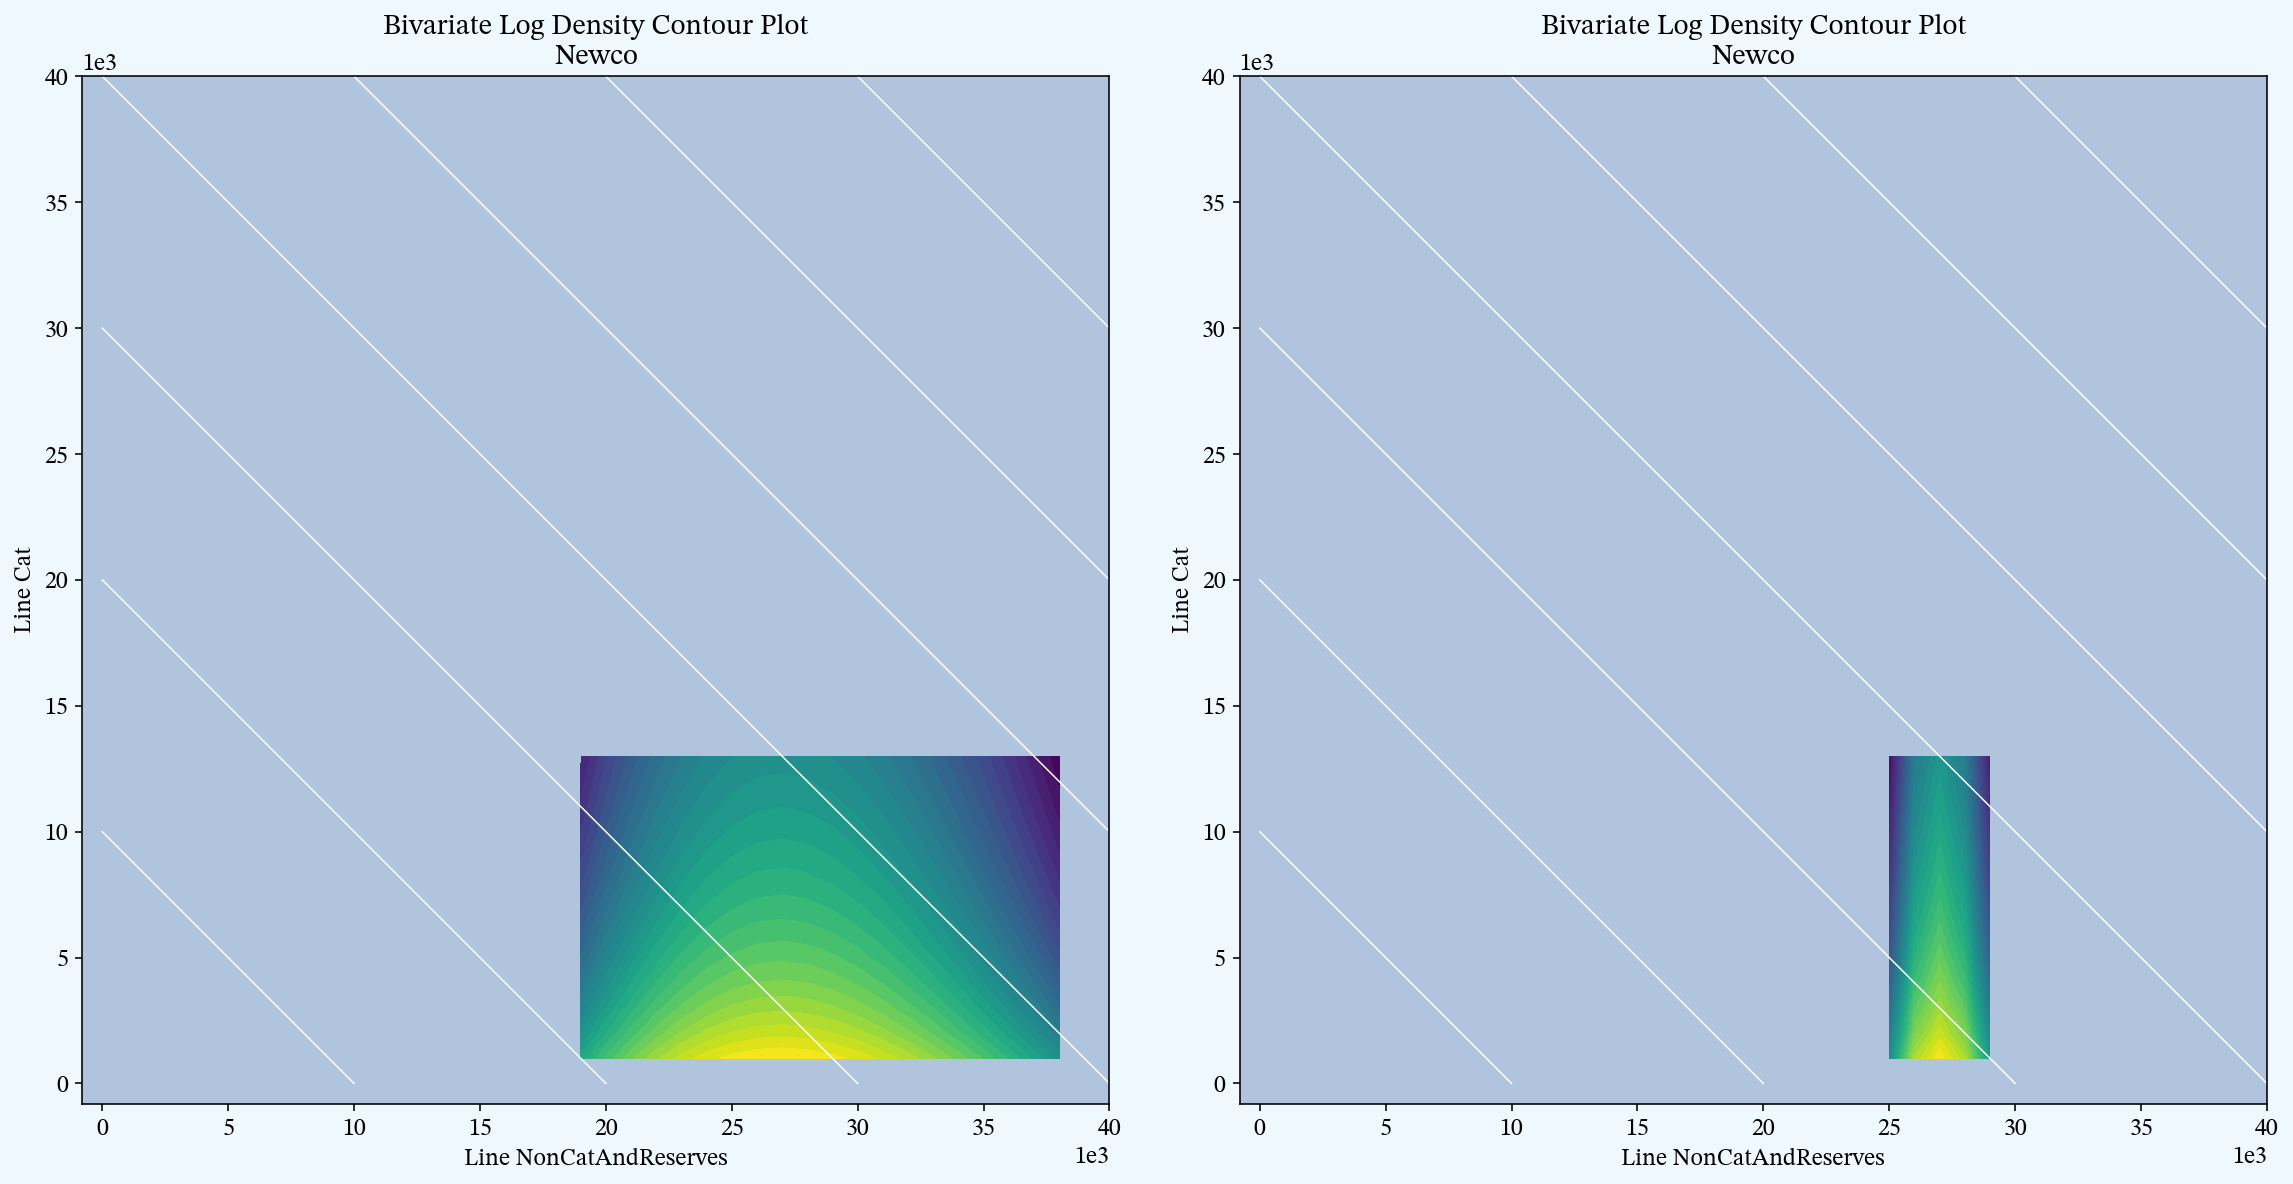

time: 562 ms (started: 2022-07-08 12:46:30 -04:00)


In [12]:
%%sf 1 2 8 8 
porta.biv_contour_plot(f, ax0, 0, 40e3, 1e3, cmap='viridis')
portb.biv_contour_plot(f, ax1, 0, 40e3, 1e3, cmap='viridis')

## Cat / Non-Cat Capital Model Case: New Syntax

In [1]:
logger_level(30)
%run -i snippets.py

hello from aggregate.__init__
All directories exist
time: 672 ms (started: 2022-07-12 15:24:19 -04:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
prog_noncat = 'agg NC 1 claim sev gamma 6840 cv 0.037 # 19500 fixed'
noncat = build(prog_noncat)
noncat.report_df

view,0,Independent,Mixed,Empirical,Error
statistic,,,,,
Name,NC,NC,NC,,
Limit,inf,inf,inf,,
Attachment,0.000,0.000,0.000,,
Expected Loss,"26,340.000","26,340.000","26,340.000",,
Freqency Mean,1.000,1.000,1.000,,
Freqency CV,0.000,0.000,0.000,,
Freqency Skewness,,,,,
Severity Mean,"26,340.000","26,340.000","26,340.000","26,339.101",-0.000
Severity CV,0.010,0.010,0.010,0.010,-0.006


time: 234 ms (started: 2022-07-12 15:24:20 -04:00)


In [3]:
prog_cat_gross = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.4'
cat = build(prog_cat_gross, log2=18, bs=1)
cat.report_df

24:21.230|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
24:21.231|3111|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
24:21.673|3117|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.


view,0,1,Independent,Mixed,Empirical,Error
statistic,,,,,,
Name,CAT,CAT,CAT,CAT,,
Limit,inf,inf,inf,inf,,
Attachment,0.000,0.000,0.000,0.000,,
Expected Loss,"1,045.760",200.000,"1,245.760","1,245.760",,
Freqency Mean,26.144,2.000,28.144,28.144,,
Freqency CV,0.445,0.812,0.418,0.442,,
Freqency Skewness,0.805,1.009,0.784,0.804,,
Severity Mean,40.000,100.000,44.264,44.264,44.264,0.000
Severity CV,1.700,2.500,2.140,2.140,2.140,-0.000


time: 1.16 s (started: 2022-07-12 15:24:20 -04:00)


In [4]:
prog_cat_net = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.4 aggregate net of 1325 xs 2000'
net = build(prog_cat_net, log2=18, bs=1)
net.report_df

24:22.525|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
24:22.525|3111|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
24:22.973|3117|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.


view,0,1,Independent,Mixed,Empirical,Error
statistic,,,,,,
Name,CAT,CAT,CAT,CAT,,
Limit,inf,inf,inf,inf,,
Attachment,0.000,0.000,0.000,0.000,,
Expected Loss,"1,045.760",200.000,"1,245.760","1,245.760",,
Freqency Mean,26.144,2.000,28.144,28.144,,
Freqency CV,0.445,0.812,0.418,0.442,,
Freqency Skewness,0.805,1.009,0.784,0.804,,
Severity Mean,40.000,100.000,44.264,44.264,42.143,-0.048
Severity CV,1.700,2.500,2.140,2.140,1.744,-0.185


time: 1.36 s (started: 2022-07-12 15:24:21 -04:00)


In [6]:
cat.q(0.9),cat.q(0.99), cat.q(0.996), cat.q(0.999), net.q(0.9), net.q(0.99), net.q(0.996), net.q(0.999)

(2170.0, 3600.0, 4294.0, 5761.0, 2000.0, 2000.0, 2262.0, 3358.0)

time: 1.25 s (started: 2022-07-12 15:24:49 -04:00)


In [7]:
# blend calibration
# A- bond, default 5 bps, spread 195 bps over treasuriesw
# most recent cat bond EL 0.009, spread 0.053
# cat bonds average el 4.2% at 8.5%
s_values = [0.0005, 0.009, 0.042]
y = np.array([0.0195, 0.042, 0.085])
gs = y / (1+y)

time: 0 ns (started: 2022-07-12 15:24:52 -04:00)


In [ ]:
catco = cs.CaseStudy()
catco.factory(case_id='CatCo',
                   case_name='CatCo Capital Model',
                   case_description='CatCo capital model calibrated to S&P',
                   a_distribution       = prog_noncat,
                   b_distribution_gross = prog_cat_gross,
                   b_distribution_net   = prog_cat_net,
                   reg_p=0.99995,      # backed into number so the net capital is correct
                   roe=0.085,
                   d2tc=0.281118428,    # to get about the right amount of debt
                   f_discrete=False, 
                   s_values=s_values,
                   gs_values=gs,
                   bs=1,
                   log2=18,
                   padding=1)
# catco.to_json();

In [13]:
catco.cap_table

Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
Debt,3.003k,76.656m,36.172k,129.351u,39.175k,49.999u,1.000
Equity,7.679k,196.018m,28.493k,111.810m,36.172k,129.352u,923.344m
Premium,907.000,23.153m,27.586k,431.565m,28.493k,111.810m,727.326m
Loss,27.586k,704.174m,0.000,1.000,27.586k,431.565m,704.174m


time: 16 ms (started: 2022-07-12 15:26:19 -04:00)


In [15]:
catco.make_cap_table('net')
self = catco

time: 16 ms (started: 2022-07-12 15:26:52 -04:00)


In [16]:
for t in [self.cap_table, self.cap_table_total, self.cap_table_marginal]:
    display(t)

Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
Debt,2.400k,65.319m,34.343k,104.011u,36.743k,49.993u,1.000
Equity,6.138k,167.052m,28.205k,126.929m,34.343k,104.011u,934.681m
Premium,725.000,19.732m,27.480k,474.447m,28.205k,126.929m,767.629m
Loss,27.480k,747.898m,0.000,1.000,27.480k,474.447m,747.898m


None

None

time: 16 ms (started: 2022-07-12 15:26:53 -04:00)


In [18]:
self.make_all()
self.show = False
self.show_exhibits('all')

30:20.829|2628|Level 35  | aggregate, make_all|  boundss and pstar done
30:20.930|2519|WARNING   | aggregate.port, calibrate_distortion|  Portfolio.calibrate_distortion | Questionable convergenge! tvar, target 28493.446667553842 error 0.00013184792987885885, 200 iterations


Esscher Failed to converge after 50 iterations, value is 6.0203560105856985e-05.


30:21.776|2631|Level 35  | aggregate, make_all|  classic pricing done
30:22.842|2634|Level 35  | aggregate, make_all|  modern monoline done
30:41.549|2637|Level 35  | aggregate, make_all|  ad comps done
30:43.644|2640|Level 35  | aggregate, make_all|  apply distortions done
30:44.000|2643|Level 35  | aggregate, make_all|  Bodoff exhibits done


time: 23.4 s (started: 2022-07-12 15:30:20 -04:00)


In [19]:
self.make_progression()

time: 31 ms (started: 2022-07-12 15:30:56 -04:00)


Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
Debt,"3,003.0",0.077,"36,172.0",0.000,"39,175.0",4.9999e-05,1.000
Equity,"7,679.0",0.196,"28,493.0",0.112,"36,172.0",0.00012935,0.923
Premium,907.0,0.023,"27,586.0",0.432,"28,493.0",0.11181,0.727
Loss,"27,586.0",0.704,0.0,1.000,"27,586.0",0.43156,0.704


,Assets,Adequacy,Loss,Premium,LR,Margin,Capital,CoC,Discount
Tranche,,,,,,,,,
Debt,"39,175.0",1.000,"27,585.5","28,493.4",0.968,907.9,"10,681.6",0.1,0.078
Equity,"36,172.0",1.000,"27,585.3","28,484.1",0.968,898.8,"7,687.9",0.1,0.105
Premium,"28,493.0",0.888,"27,514.1","28,263.1",0.974,749.0,229.9,3.3,0.765
Loss,"27,586.0",0.568,"27,293.1","28,011.1",0.974,718.0,-425.1,-1.7,2.451


,Assets,Adequacy,Loss,Premium,LR,Margin,Capital,CoC,Discount
Tranche,,,,,,,,,
Debt,"3,003.0",7.9353e-05,0.2,9.4,0.026,9.1,"2,993.6",0.0,0.003
Equity,"7,679.0",0.11168,71.2,221.0,0.322,149.8,"7,458.0",0.0,0.020
Premium,907.0,0.31975,221.0,252.0,0.877,31.0,655.0,0.0,0.045
Loss,"27,586.0",0.56844,"27,293.1","28,011.1",0.974,718.0,-425.1,-1.7,2.451
Total,"39,175.0",0.99995,"27,585.5","28,493.4",0.968,907.9,"10,681.6",0.1,0.078


Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
Debt,"2,400.0",0.065,"34,343.0",0.000,"36,743.0",4.9993e-05,1.000
Equity,"6,138.0",0.167,"28,205.0",0.127,"34,343.0",0.00010401,0.935
Premium,725.0,0.020,"27,480.0",0.474,"28,205.0",0.12693,0.768
Loss,"27,480.0",0.748,0.0,1.000,"27,480.0",0.47445,0.748


,Assets,Adequacy,Loss,Premium,LR,Margin,Capital,CoC,Discount
Tranche,,,,,,,,,
Debt,"36,743.0",1.000,"27,479.7","28,316.1",0.970,836.5,"8,426.9",0.1,0.090
Equity,"34,343.0",1.000,"27,479.5","28,309.5",0.971,830.0,"6,033.5",0.1,0.121
Premium,"28,205.0",0.873,"27,446.2","28,185.3",0.974,739.1,19.7,37.4,0.974
Loss,"27,480.0",0.526,"27,238.9","27,953.6",0.974,714.7,-473.6,-1.5,2.965


,Assets,Adequacy,Loss,Premium,LR,Margin,Capital,CoC,Discount
Tranche,,,,,,,,,
Debt,"2,400.0",5.4018e-05,0.2,6.7,0.026,6.5,"2,393.3",0.0,0.003
Equity,"6,138.0",0.12683,33.3,124.2,0.268,90.9,"6,013.8",0.0,0.015
Premium,725.0,0.34752,207.2,231.7,0.895,24.4,493.3,0.0,0.047
Loss,"27,480.0",0.52555,"27,238.9","27,953.6",0.974,714.7,-473.6,-1.5,2.965
Total,"36,743.0",0.99995,"27,479.7","28,316.1",0.970,836.5,"8,426.9",0.1,0.090


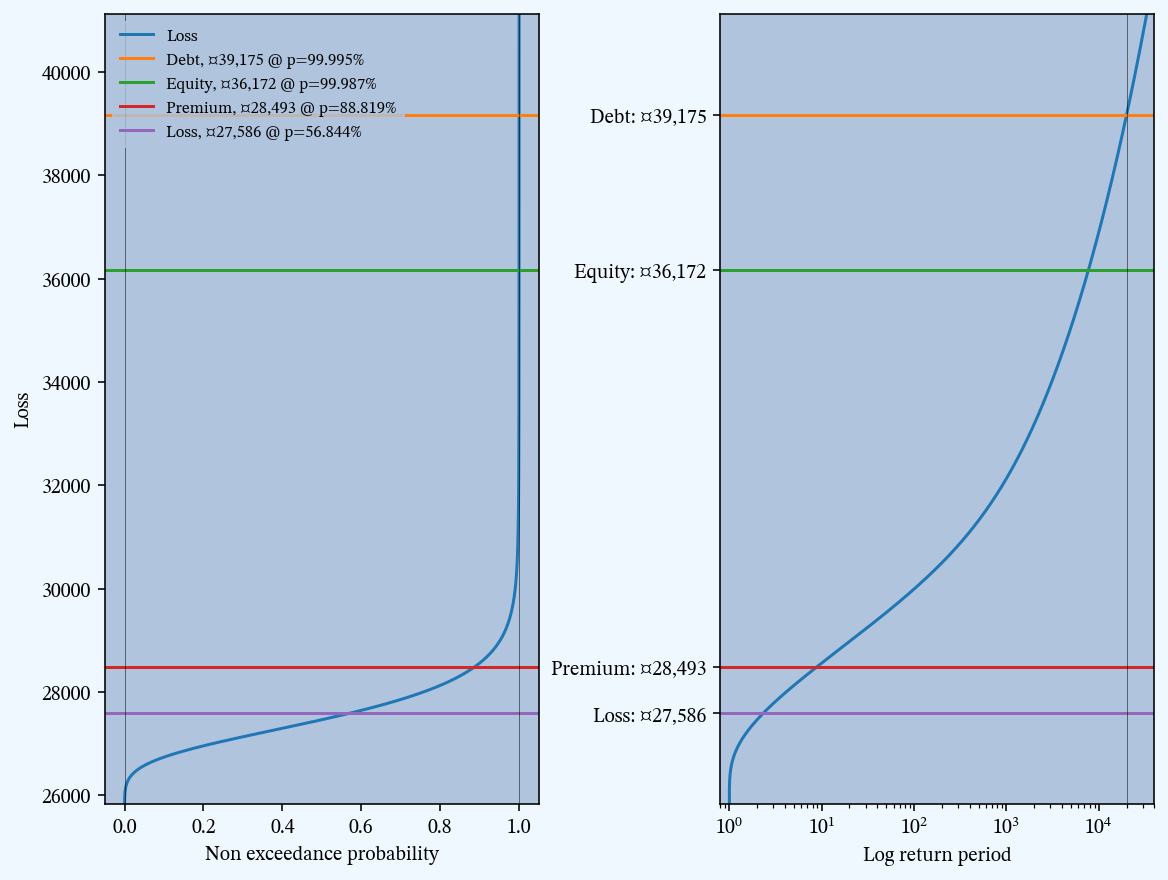

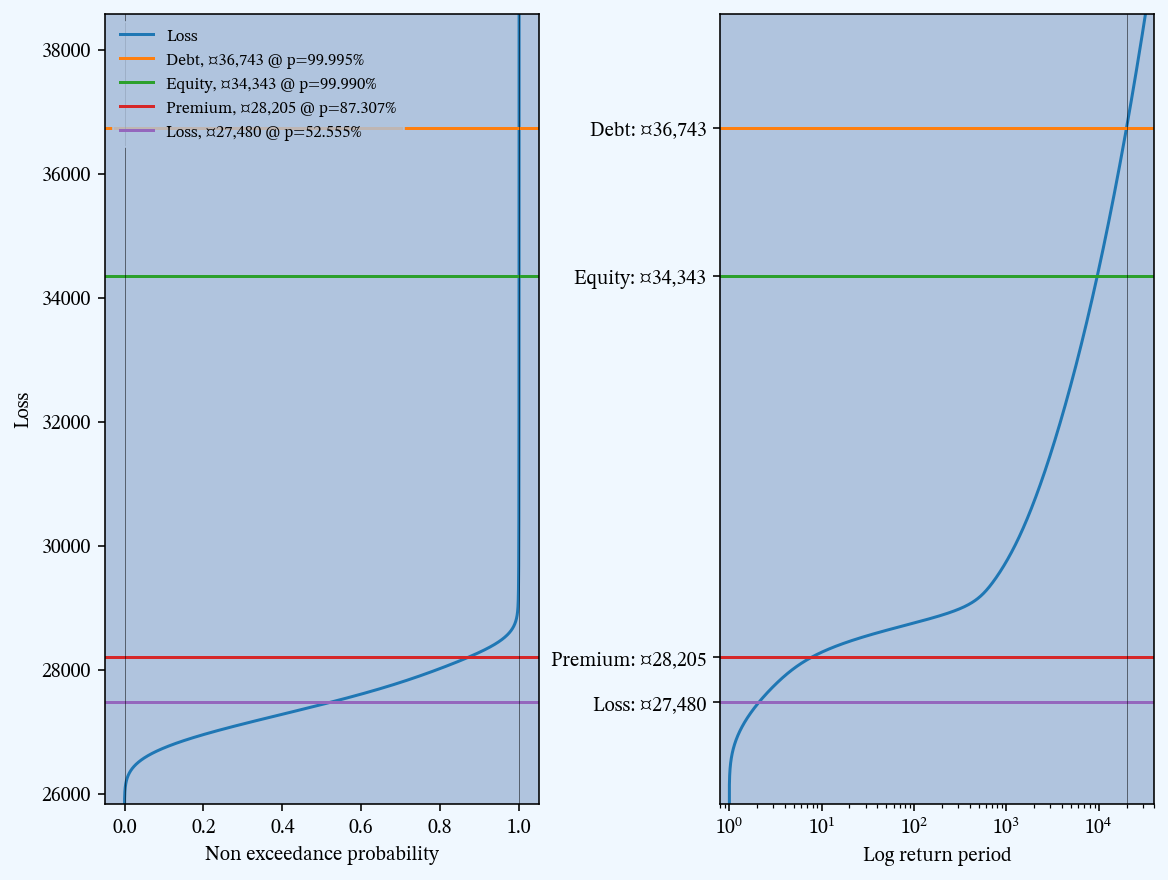

time: 6.81 s (started: 2022-07-12 15:32:15 -04:00)


In [22]:
self.show =True
self.show_extended_exhibits()

In [25]:
mrr = cs.ManualRenderResults(catco)

time: 0 ns (started: 2022-07-10 15:54:22 -04:00)


In [26]:
# custom for this analysis
mrr.render_custom('F', 'A', 'N', 'M', 'O', 'V', 'E', 'Z-TR*', 'B')

time: 16 ms (started: 2022-07-10 15:54:22 -04:00)


In [19]:
catco.show_tranching_graph('net', style='old')

time: 1.52 s (started: 2022-07-10 15:38:43 -04:00)


# Define severity as a mixture?

In [13]:
out = build('sev Atest [10 100 1000] @ expon 1 wts=3')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

time: 31 ms (started: 2022-07-08 12:47:57 -04:00)


time: 0 ns (started: 2022-07-08 13:52:13 -04:00)
